In [14]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

(512, 512)


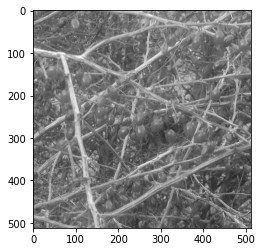

In [15]:
img = cv2.imread('low_contrast.bmp',0)
# img=cv2.resize(img,(512,512))
# fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(111)
plt.imshow(img,'gray')
print(img.shape)

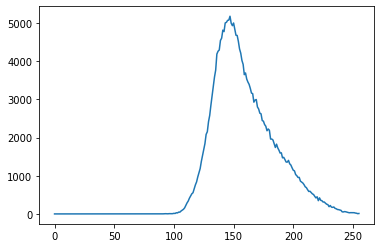

In [16]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [17]:
print(img)

[[173 172 175 ... 146 168 188]
 [165 168 168 ... 157 160 184]
 [164 164 161 ... 161 175 190]
 ...
 [145 148 144 ... 155 152 164]
 [141 139 147 ... 152 151 154]
 [135 136 140 ... 148 151 150]]


In [18]:
min(map(min, img))

77

In [19]:
freq_arr=np.zeros(256,'uint64')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        freq_arr[img[i][j]]=freq_arr[img[i][j]]+1

# print(freq_arr)

sum=img.shape[0]*img.shape[1]
pdf=np.zeros(256,'float64')
for i in range (256):
    pdf[i]=freq_arr[i]/sum
# print(pdf)


In [20]:
running_sum=np.zeros(256,'float64')
running_sum[0]=pdf[0]
for i in range(1,256):
    running_sum[i]=running_sum[i-1]+pdf[i]

for i in range(1,256):
    running_sum[i]=running_sum[i]*255

hist_eq_level=np.zeros(256,'uint16')
for i in range(256):
    hist_eq_level[i]=round(running_sum[i])
print(hist_eq_level)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   1   1   1   1   2   2   3   3   4   5   6   7   8   9  10  12  13
  15  17  19  21  24  27  30  33  36  40  44  48  53  57  61  66  71  76
  81  85  90  95 100 105 110 115 119 124 128 132 136 140 144 148 151 155
 158 161 165 168 171 174 176 179 182 185 187 190 192 195 197 199 201 203
 206 207 209 211 213 215 217 218 220 221 223 224 226 227 229 230 231 232
 234 235 236 237 238 239 240 241 242 243 243 244 245 245 246 247 247 248
 248 249 249 250 250 250 251 251 252 252 252 252 253 253 253 253 253 254
 254 254 254 254 254 254 254 255 255 255 255 255 25

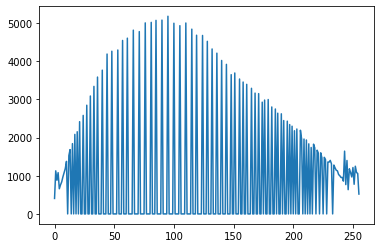

In [21]:
new_img=np.zeros(img.shape,'uint16')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i][j]=hist_eq_level[img[i][j]]

# print(new_img)
hist1 = cv2.calcHist([new_img],[0],None,[256],[0,256])
plt.plot(hist1) 
plt.show()

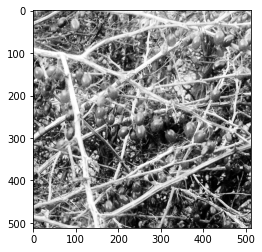

In [22]:
plt.imshow(new_img,'gray')

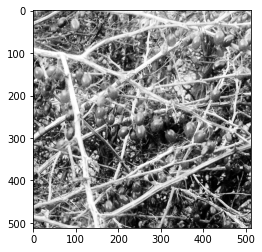

In [23]:
flat=cv2.equalizeHist(img)
plt.imshow(flat,'gray')

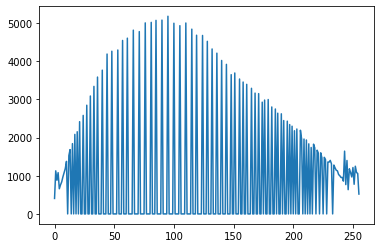

In [24]:
plt.plot(cv2.calcHist([flat],[0],None,[256],[0,256]))